<a href="https://colab.research.google.com/github/falahamro/twitter_harvest_academic/blob/main/GENERIC__Discourse_on_Reddit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#secret	q9JaXCbqdbV1o8tUS5tugCy_Cx3W-w
#developers	: Electrical_Jicama242
#App ID: aRqrscGSOAHRsKL6Vp8PSQ

In [7]:
#pip install credentials

In [4]:
import requests
import plotly.graph_objects as go
import praw
from psaw import PushshiftAPI
import credentials as cred
import csv
import pandas as pd


ModuleNotFoundError: ignored

In [ ]:
import praw 
reddit = praw.Reddit(client_id = 'tvHkTZ-wanEENSM1GSdQ5w',
                     client_secret = 'kw-wzX7cNVvYYi8VBCjxjQp5C2Pn9Q',
                     username = 'tutorialSocialMedia',
                     password = 'password123',
                     user_agent = 'tutorialpython'
                    )

In [ ]:
from datetime import datetime
import pandas as pd

#start_epoch = int(datetime().timestamp())
#end_epoch = int(datetime().timestamp())

hurricane_ida_subreddits = [
#               'hurricaneida',
#               'hurricane',
#               'tropicalweather',
#               'neworleans',
#               'louisiana',
#               'collapse',
               'publicfreakout']
# canada_flood_subreddits = [
#             'tropicalweather',
#             'collapse',
#             'publicfreakout',
#             'canada',
#             'britishcolumbia',
#             'vancouver']
# climate_related_subreddits = [
#               'climate',
#               'climatechange',
#               'climateactionplan',
#               'ecointernet',
#               'environment',
#               'sustainability',
#               'weather']
# subreddits = hurricane_ida_subreddits + climate_related_subreddits

subreddits = []

q = "hurricane ida|hurricane|ida"
column_names = ["index", "is_post", "subreddit", "author", "post_title", "post_text", 
                "num_comments", "score", "upvote_ratio", "flair", "post_url", "post_time"]
posts_table = []
counter = 0

for subreddit in subreddits:
    results = list(api.search_submissions(q=q, after=start_epoch,before=end_epoch,
                            subreddit=subreddit,
                            filter=['subreddit', 'author', 'title', 'url'],
                            limit=1000000))
    for p in results:
        counter += 1

        # Add the post to the table
        posts_table.append([counter, "yes", p.subreddit, p.author, p.title, p.selftext, p.num_comments, p.score, p.upvote_ratio, p.link_flair_text, p.permalink,
                            datetime.utcfromtimestamp(p.created)])

        # Add the comments (only top level ones)
        for comment in p.comments:
            # retrieve all comments using more API calls if needed
            p.comments.replace_more(limit=1000)
            posts_table.append([counter, "no", p.subreddit, comment.author, p.title, comment.body, "", comment.score, "", "", comment.permalink,
                                datetime.utcfromtimestamp(comment.created)])

reddit_df = pd.DataFrame(posts_table, columns=column_names)
reddit_df_cp = pd.DataFrame(posts_table, columns=column_names)

In [ ]:
reddit_df.shape


(0, 12)

In [ ]:
reddit_df.head(25)


,index,is_post,subreddit,author,post_title,post_text,num_comments,score,upvote_ratio,flair,post_url,post_time


In [ ]:
reddit_df["post_text"] = reddit_df["post_text"].str.replace('\n', '')
reddit_df["post_title"] = reddit_df["post_title"].fillna("")
reddit_df["post_text"] = reddit_df["post_text"].fillna("")
reddit_df["flair"] = reddit_df["flair"].fillna("")
reddit_df["author"] = reddit_df["author"].fillna("")

In [ ]:
reddit_df["post_time_year"] = reddit_df["post_time"].apply(lambda x: x.year)
reddit_df["post_time_month"] = reddit_df["post_time"].apply(lambda x: x.month)
reddit_df["post_time_day"] = reddit_df["post_time"].apply(lambda x: x.day)

In [ ]:
labels = reddit_df.loc[(reddit_df["post_text"] == "[deleted]") |
                       (reddit_df["post_text"] == "[removed]")].index
reddit_df.drop(reddit_df.index[labels], inplace=True)
reddit_df.drop_duplicates(inplace=True)

,index,is_post,subreddit,author,post_title,post_text,num_comments,score,upvote_ratio,flair,post_url,post_time,post_time_year,post_time_month,post_time_day


In [ ]:
reddit_df.isna().sum()


index              0.0
is_post            0.0
subreddit          0.0
author             0.0
post_title         0.0
post_text          0.0
num_comments       0.0
score              0.0
upvote_ratio       0.0
flair              0.0
post_url           0.0
post_time          0.0
post_time_year     0.0
post_time_month    0.0
post_time_day      0.0
dtype: float64

In [ ]:
reddit_df.shape


(0, 15)

In [ ]:
reddit_df.head()


,index,is_post,subreddit,author,post_title,post_text,num_comments,score,upvote_ratio,flair,post_url,post_time,post_time_year,post_time_month,post_time_day


In [ ]:
reddit_df.to_csv("", index=False)

FileNotFoundError: ignored

In [ ]:
hot = subred.hot(limit = 150)    


In [ ]:
for i in hot:
    print(i.title)

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



r/maga Lounge
Viral Video
Thanks Joe...... #Biden'sAmerica


In [ ]:
import pandas as pd
df = []

for post in subred.hot( limit=150):
    df.append([post.title[:40], post.author, post.score, post.num_comments, post.upvote_ratio]
             )
df = pd.DataFrame(df, columns=["title","author", "score","num_comments", "upvote_ratio"])
df.info()
df.head(50)

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         3 non-null      object 
 1   author        3 non-null      object 
 2   score         3 non-null      int64  
 3   num_comments  3 non-null      int64  
 4   upvote_ratio  3 non-null      float64
dtypes: float64(1), int64(2), object(2)
memory usage: 248.0+ bytes


,title,author,score,num_comments,upvote_ratio
0,r/maga Lounge,cdox_,1,1,0.66
1,Viral Video,mrkittycatcat,1,3,0.67
2,Thanks Joe...... #Biden'sAmerica,JurtisCackson,11,35,0.87


In [ ]:
df.sort_values(by=['num_comments'], ascending=False).head()


,title,author,score,num_comments,upvote_ratio
2,Thanks Joe...... #Biden'sAmerica,JurtisCackson,9,35,0.78
1,Viral Video,mrkittycatcat,1,3,0.67
0,r/maga Lounge,cdox_,1,1,0.66


<Figure size 720x720 with 0 Axes>

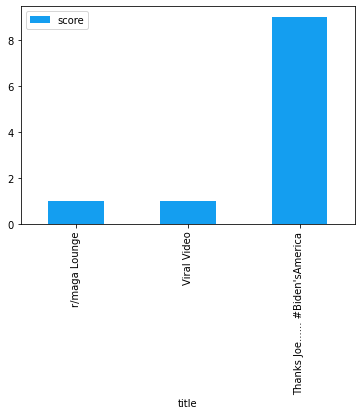

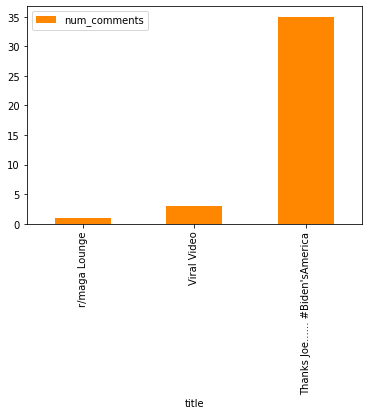

In [ ]:
from matplotlib import pyplot as plt

plt.figure(figsize=(10,10))

df.head(10).plot.bar(x='title', y='score', color='#149EF0') #reddit blue
plt.show()

df.head(10).plot.bar(x='title', y='num_comments', color='#FF8700') #reddit orange
plt.show()

In [ ]:
import numpy as np
import scipy.stats
nump = df.to_numpy()
scoreArray = (nump[:,2]).astype(np.float32) #array score
num_commentArray = (nump[:,3]).astype(np.float32) #array commenti
r = scipy.stats.pearsonr(scoreArray, num_commentArray)
r[0]

0.9986254289035241

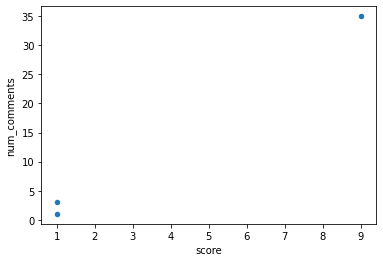

In [ ]:
df['score'].corr(df['num_comments'])
df.plot.scatter(x="score", y="num_comments")

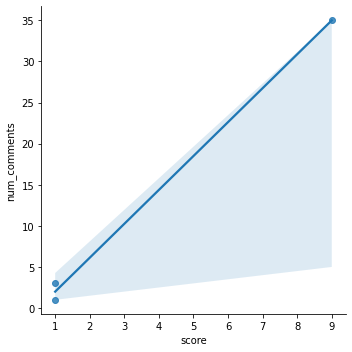

In [ ]:
import seaborn as sns
sns.lmplot(x='score',y='num_comments',data=df,fit_reg=True) 